Physics 474 - Fall 2022

Homework 1 - fitting x,y data<br>
The Stellar Lulinosity-Mass Relationship

<font color='red'>Author: your name here
    

Fore this homework we will do a  basic $\chi^2$ least-square fit and analysis of some data we are given. We will make observations as we go along, and finally make some conclusions on a physics problem.

We will examine data of stellar luminosities versus mass, which is seen to generally observe a power law relationship on the order of:

$\; \; \; \; \frac{L}{L_\odot} \approx (\frac{m}{m_\odot})^4$

where $L_\odot$ and $m_\odot$ are the standard solar luminosity and mass respectively.

We will use a log10-log10 plot, so the power law,

$\; \; \; \; \frac{L}{L_\odot} \approx (\frac{m}{m_\odot})^4$

would show as a straight line with slope $\approx$4.0 on this log-log plot. <br>


We will use data taken from 'Mass–luminosity relation of intermediate-mass stars', O. Yu. Malkov
Monthly Notices of the Royal Astronomical Society, Volume 382, Issue 3,
December 2007, Pages 1073–1086,
https://doi.org/10.1111/j.1365-2966.2007.12086.x
Published: 28 November 2007


___________________________________________________________________________________
The data are supplied in a comma-separated-variable (.csv) file, which is a text file
that can be visualy inspected by clicking on the file in the jupyter browser. The filename is
'lum-mass-data.csv' and needs to be downloaded from ELMS.

The file shows the data for each of the stars as a single row,
and the n measurements for each star are the columns separated by commas. The lines starting
with a # are ignored by the reader.

It can be read in and the data put in separate numpy arrays using the command

array_1, array_2, ... array_n = np.loadtext(filename,delimter=',',unpack=True)

where the n arrays match the number of columns, and length of each array is equal to the number
of rows.



PART 1:

- Start by dowloading the file into your working directory and viewing the text file <br>
- Then read in the file. Shown here since this may be new to you in python
____________________________________________________________________________________

In [1]:
#import modules we will use
import numpy as np   #import numpy methods
import matplotlib.pyplot as plt   #import plotting methods
import scipy.stats as st   #needed for chi^2 probability later if we need it

# read data from CSV data file and put into 6 arrays
"""
mass = stellar mass [units of solar mass]
mass_er = error on stellar mass [solar mass]
lum_log = log10(luminosity)    #not used in this script
lum_log_er = error on lum_log  #not used in this script
lum = stellar luminosity [units of solar luminosity]
lum_er = error on luminosity [units of solar luminosity]
"""
filename = 'lum-mass-data.csv'
mass, mass_er, lum_log, lum_log_er,lum, lum_er = np.loadtxt(filename, encoding='utf-8-sig', delimiter=',',unpack=True)

#let's print the length(size) of the mass array to see how many data points we have
print('Number of data points = ',np.size(mass), mass.size) 
#can access array size 2 ways, as numpy function or attribute of numpy object

Number of data points =  197 197


__________________________________________________________________
Part 2: 

Make a quick plot of the data Luminosity vs Mass with errorbars

- make the axes of the plot a log-log plot
- label the axes
- put a grid on the plot

__________________________________________________________________

<function matplotlib.pyplot.show(close=None, block=None)>

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 119898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 119898 missing from current font.
  font.set_text(s, 0, flags=flags)


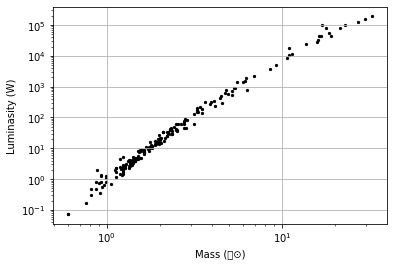

In [2]:

plt.scatter(mass,lum,c='black',s=5)
plt.xlabel('Mass (𝑚⊙)')
plt.ylabel('Luminasity (W)')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.show



---------------------------------------------------------------------------------
Okay!

Looks like nice data... Can clearly see there is a relationship between stellar luminosy
and stelar mass. It looks fairly linear on log-log plo. A straigt line with slope $\alpha$ 
on this log-log plot would mean an equation

$\; \; \; \; \log \left(\frac{L}{L_\odot}\right)  =
\alpha \log \left(\frac{m}{m_\odot}\right)
= \log \left(\frac{m}{m_\odot}\right)^\alpha$

or,

$\; \; \; \; \frac{L}{L_\odot} = \left(\frac{m}{m_\odot}\right)^\alpha$

---------------------------------------------------------------------------------

Part 3:

Use the data points and errors given to fith the data for the power $\alpha$ in the equation above.

- Use scipy.optimize.curve_fit() to perform a $\chi^2$ fit for the parameter $\alpha$
- Notice there are errors in x and y (i.e. $\sigma_m$ and $\sigma_L$). You will need to propogate the $\sigma_m$ into $L$ and add in quadrature to $\sigma_L$ to get $\sigma_{Tot}$ to put in curve_fit. You can assume $\alpha=4$ for this propogation, and you see now one of the limitations of using curve_fit, which calculates a simple $\chi^2$, versus using the minimizer and defining your own $\chi^2$ where you can vary the definition of $\sigma_{tot}$ with variation in the parameter $\alpha$.
- Plot the Data points with errorbars along with the best fit curve as above, and also adding a legend
- put text somewhere that shows the best fit $\alpha$.

[3.95368989]
[[8.74189026e-05]]


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 119898 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 119898 missing from current font.
  font.set_text(s, 0, flags=flags)


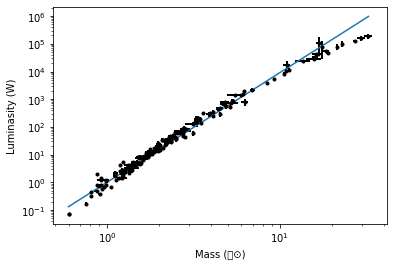

In [81]:
# Your code here...

from scipy.optimize import curve_fit

def theory (m,a):
    L = (m)**a
    return L
a0 = 4
sigTot= np.sqrt((4*mass**3*mass_er)**2+lum_er**2)
popt, pcov = curve_fit(theory, mass, lum, a0, sigma=sigTot, absolute_sigma=True)
print(popt)
print(pcov)
a1=popt[0]

plt.errorbar(mass,lum,c='black',yerr=lum_er,xerr=mass_er,fmt='.', elinewidth = 2, ecolor='black')
x=np.linspace(np.min(mass),np.max(mass),100)
theoryL=theory(mass,a1)
theory_chi = theory(x,a1)
plt.xscale('log'),plt.yscale('log')
plt.scatter(mass,lum,s = 5, c='red')
plt.xlabel('Mass (𝑚⊙)')
plt.ylabel('Luminasity (W)')
plt.plot(x,theory_chi)





_________________________________________________________________________________________
<font color='red'>Write down your observations here...


__________________________________________________________________________________________
Part 4:

Now we want to look at the risiduals, or difference betwee Data and Fit.
- Make a figure with 2 subplots (top and bottom) both versus mass
- top subplot, plot (Data-Fit)/sigma vs mass (without errorbars)
- bottom subplot, plot (Data-Fit)/Data vs mass (with errorbars)

________________________________________________________________________________________

<ErrorbarContainer object of 3 artists>

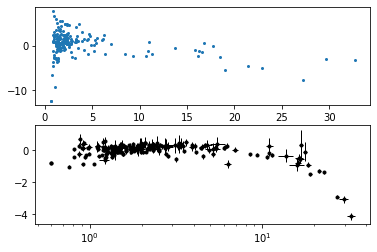

In [96]:
risiduals = lum - theoryL
fig, axs = plt.subplots(2)
plt.xscale('log')
dRdL=(mass**popt)/(theoryL**2)
dRdm=(popt*mass**(popt-1))/(theoryL)
sigR=np.sqrt((dRdL**2)*(lum_er**2)+(dRdm**2)*(mass_er**2))
axs[0].scatter(mass,(risiduals/sigTot),s=4)
axs[1].errorbar(mass,(risiduals/lum),c='black',yerr=sigR,xerr=mass_er,fmt='.', elinewidth = 1, ecolor='black')




___________________________________________________________________________________
<font color='red'>Observations & Summary...


____________________________________________________________________________________